In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import random
from sklearn.cluster import KMeans
plt.style.use("fivethirtyeight")

def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    x = np.linspace(-10,10,nx)
    y = np.linspace(-10,10,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec,m,C)
    return X,Y,Z

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

Means = np.array([[0, 3], [3, 0], [4,4]]) # Define three means

CovMatrices = np.zeros((3,2,2)) # Define three covariance matrices ensuring they are positive definite
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)

w = np.random.rand(3) # Priors
w = w / np.sum(w)

nData = np.floor(w * 1000).astype(int) # How many data in each component (1000 in total)

X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:]) # Draw samples from each component
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

X = np.append(np.append(X0, X1, axis=0), X2, axis=0) # Append into an array for the data we need

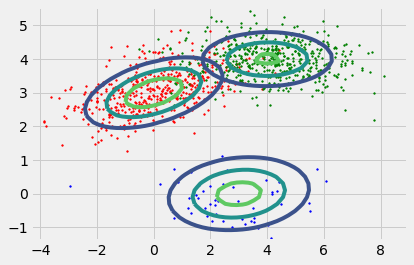

In [275]:
plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

plt.scatter(X0[:,0], X0[:,1], s=3,c="r")
plt.scatter(X1[:,0], X1[:,1], s=3,c="b")
plt.scatter(X2[:,0], X2[:,1], s=3,c="g")

for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3)

In [2]:
def distance(x,y):
    # Given two data points, calculates the Euclidean distance between them
    dist = 0
    for i in range(len(x)):
        if x[i] is None or y[i] is None:
            continue
        dist += (x[i]-y[i])**2
    return np.sqrt(dist)

def indexofclosest(x,centres):
    # Given a list "centres", finds which centre is closest to x and returns its index in the list
    shortest = 9999999999999
    for i in range(len(centres)):
        dist = distance(x,centres[i])
        if (dist < shortest):
            closestcentre = i
            shortest = dist
    return closestcentre

def canimprove(errors,tolerance):
    # For the main loop of kmeans2()
    if errors is None:
        return True
    for i in errors:
        if i > tolerance:
            return True
    return False

def kmeans2(X,K=3, tolerance = 0.0001):
    # K-means clustering of data X into K clusters
    centres = []
    clusters = [[] for i in range(K)] # Have a list containing the data split up into K lists according to which centre is closest
    for i in range(K):
        centres.append(random.choice(X)) # Get K random initial centres

    for coord in X: # For each item in data set, get closest centre
        index = indexofclosest(coord,centres)
        clusters[index].append(coord) # Append each coordinate to corresponding list

    for i in range(K): # Convert into a numpy array
        clusters[i] = np.asarray(clusters[i])

    centrehistory = [list(centres)] # Keep track of previous cluster centres in each iteration
    errors = None
    while canimprove(errors,tolerance):
        errors = []
        for i in range(K):
            dims = len(clusters[0][0])
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clusters[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                sumofpoints[dim] /= itemswithdim[dim]

            errors.append(distance(sumofpoints,centres[i]))
            centres[i] = (sumofpoints)

        centrehistory.append(list(centres))

        clusters = []
        for i in range(K):
            clusters.append([])

        for coord in X:
            index = indexofclosest(coord,centres)
            clusters[index].append(coord)
        for i in range(K):
            clusters[i] = np.asarray(clusters[i])
          
    return (centres, clusters,centrehistory)
        
centres, clusters, centrehistory = kmeans2(X,3)



In [306]:
total = 0
for i in range(3):
    cluster = clusters[i]
    for x in cluster:
        if x in X0 and i == 1:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 0:
            total += 1
print(total)
print(len(X))

906
998


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


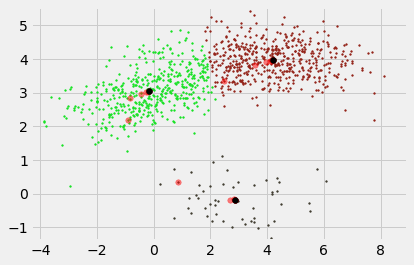

In [298]:

'''for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3,alpha=0.7)'''

plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

for i in clusters:
    plt.scatter(i[:,0], i[:,1], s=3,c=np.random.rand(3,))
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,0],centres2[:,1],s=30,c="red",alpha=0.5)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,0],centres2[:,1],s=35,c="black")



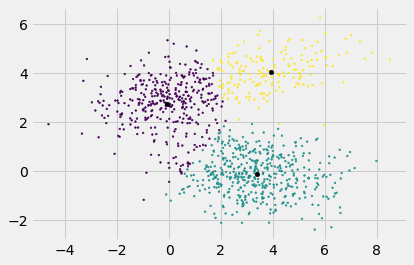

In [268]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters_sklearn = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters_sklearn, s=3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

801 of 998
831 of 998


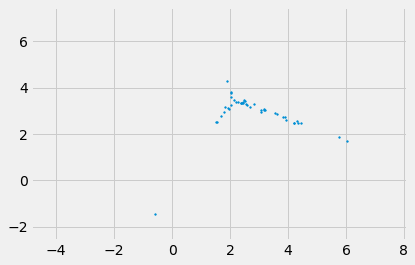

In [260]:
total = 0
for i in range(3):
    cluster = clusters[i]
    for x in cluster:
        if x in X0 and i == 0:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 1:
            total += 1
print(total, "of", len(X))


total = 0
clusters2 = [[] for i in range(max(clusters_sklearn+1))]
for i in range(len(clusters_sklearn)):
    clusters2[clusters_sklearn[i]].append(X[i])
for i in range(3):
    cluster = clusters2[i]
    for x in cluster:
        if x in X0 and i == 1:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 0:
            total += 1
            
            
print(total, "of", len(X))

#print(np.isin(i,clusters2[1]))
#print(clusters[0][0] not in (clusters2[1]))
      
diff = []
for i in clusters[0]:
    if not any([all(i==j) for j in clusters2[1]]):#if np.isin(i,clusters2[1]):#if i not in clusters2[1]:
        diff.append(i)
for i in clusters[2]:
    if not any([all(i==j) for j in clusters2[2]]):#if np.isin(i,clusters2[2]):#if i not in clusters2[2]:
        diff.append(i)
for i in clusters[1]:
    if not any([all(i==j) for j in clusters2[0]]):#if np.isin(i,clusters2[0]):#if i not in clusters2[0]:
        diff.append(i)
diff = np.array(diff)
#print(diff)


plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))
plt.scatter(diff[:, 0], diff[:, 1], s=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


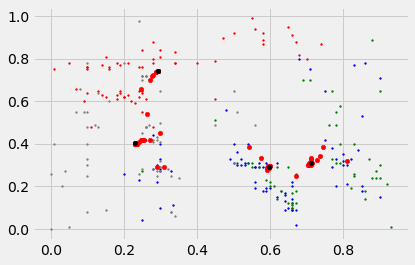

In [312]:
file = open("lab6 data.csv","r")
lines = file.readlines()
data = []
targets = []
for x in lines:
    line = x.split(",")
    if line[0] == 'ï»¿0':
        line[0] = "0"
    for i in range(5):
        line[i] = float(line[i])
    data.append(line[:5])
    targets.append(line[5])
    

dim1 = 4
dim2 = 3

colormap = {0:"r",1:"b",2:"g",3:"grey",4:"white"}
    
centres, clusters, centrehistory = kmeans2(data,4)
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=colormap[clusters.index(i)])
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")

[2 2 2 1 1 2 2 1 1 2 3 1 1 3 3 3 1 2 2 2 1 2 2 1 1 3 1 1 0 3 3 1 1 2 2 2 1
 2 1 1 1 3 3 1 1 3 3 3 0 2 2 2 1 2 2 1 1 3 3 1 1 3 3 1 1 2 2 2 2 2 2 2 1 3
 3 1 1 3 1 1 1 2 2 1 1 1 2 1 1 3 3 1 1 3 3 1 1 2 2 2 1 2 2 1 1 3 3 3 1 3 3
 3 0 2 2 2 1 0 3 3 1 1 3 3 3 0 3 3 1 1 2 2 1 0 2 2 1 1 3 1 1 1 3 3 3 0 2 1
 1 0 2 2 1 1 3 3 3 0 3 3 1 1 2 2 1 2 2 3 1 2 3 3 3 1 3 3 1 0 2 2 1 0 3 2 1
 1 3 3 1 0 3 3 3 0 2 2 1 1 2 1 1 0 1 1 0 1 3 3 1 0 2 2 0 0 3 2 1 0 3 3 1 0
 3 3 1 0 2 2 0 0 2 2 1 0 3 3 1 3 3 3 1 0 2 2 1 0 3 2 0 0 3 3 1 0 3 3 1 0]


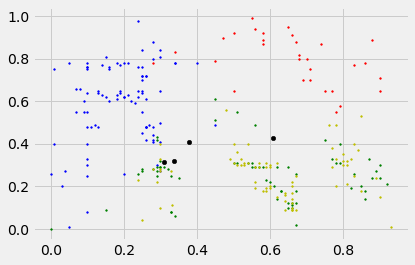

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
clusters_sklearn = kmeans.predict(data)
print(clusters_sklearn)
clusters = [[],[],[],[]]
for i in range(len(clusters_sklearn)):
    clusters[clusters_sklearn[i]].append(data[i])
for i in range(4):
    clusters[i] = np.array(clusters[i])
    
#print(clusters)
#plt.scatter(clusters_sklearn[:, 0], clusters_sklearn[:, 1], c=clusters_sklearn, s=3, cmap='viridis')
#print(np.array(clusters[0])[:,0])
dim1 = 4
dim2 = 3

plt.scatter(clusters[0][:, dim1], clusters[0][:, dim2], c="r", s=3)
plt.scatter(clusters[1][:, dim1], clusters[1][:, dim2], c="b", s=3)
plt.scatter(clusters[2][:, dim1], clusters[2][:, dim2], c="g", s=3)
plt.scatter(clusters[3][:, dim1], clusters[3][:, dim2], c="y", s=3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

In [7]:
'''file = open("Range-Queries-Aggregates.csv","r")
lines = file.readlines()
data = []
targets = []
for line in lines[1:]:
    splitline = line.split(",")
    if splitline[-1] == "\n":
        data.append([float(j) for j in splitline[1:-1]] + [0.0])
    else:
        data.append([float(j) for j in splitline[1:]])
        
print(len(data))
data = data[:20000]
    

    
centres, clusters, centrehistory = kmeans2(data,4)
print("done")
'''

'file = open("Range-Queries-Aggregates.csv","r")\nlines = file.readlines()\ndata = []\ntargets = []\nfor line in lines[1:]:\n    splitline = line.split(",")\n    if splitline[-1] == "\n":\n        data.append([float(j) for j in splitline[1:-1]] + [0.0])\n    else:\n        data.append([float(j) for j in splitline[1:]])\n        \nprint(len(data))\ndata = data[:20000]\n    \n\n    \ncentres, databyclosest, centrehistory = kmeans2(data,4)\nprint("done")\n'

In [8]:
'''dim1 = 0
dim2 = 1
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))
    
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.3)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")'''

'dim1 = 0\ndim2 = 1\nfor i in databyclosest:\n    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))\n    \nfor i in centrehistory:\n    centres2 = np.asarray(i)\n    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.3)\n    \ncentres2 = np.asarray(centres)\nplt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")'

In [40]:
file = open("Live.csv","r")
lines = file.readlines()
data = []
targets = []
for line in lines[1:]:
    splitline = line.split(",")
    data.append([int(i) for i in splitline[3:]])
    targets.append(splitline[1])
    
centres, clusters, centrehistory = kmeans2(data,4)
print("done")

done


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

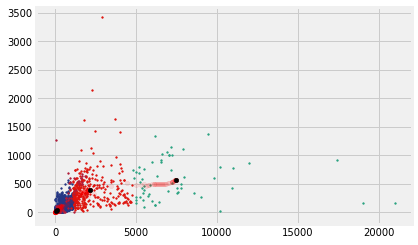

In [104]:
dim1 = 1
dim2 = 2
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))
    
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.1)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")

In [103]:
videos=0
photos=0
statuses=0
links=0 
vi = clusters[3].tolist()
ph = clusters[1].tolist()
st = clusters[2].tolist()
li = clusters[0].tolist()
for i in range(len(targets)):
    if (targets[i] == 'video') and (data[i] in vi):
        videos += 1
    if (targets[i] == 'photo') and (data[i] in ph):
        photos += 1
    if (targets[i] == 'statuses') and (data[i] in st):
        statuses += 1
    if (targets[i] == 'links') and (data[i] in li):
        links += 1
print("Vid:", videos)
print("Photo:",photos)
print("Status:",statuses)
print("Links:",links)

Vid: 105
Photo: 4064
Status: 0
Links: 0


In [10]:
file = open("allUsers.csv","r")
lines = file.readlines()
file.close()
data = []
targets = []
for line in lines[2:]:
    splitline = line.split(",")
    for i in range(2,37):
        entry = splitline[i]
        if entry == '?' or i == '?\n':
            splitline[i] = 9999
        else:
            splitline[i] = float(entry)
    #print(splitline[2:37])
    targets.append(splitline[0])
    data.append(splitline[2:37])
    #data.append([float(i) for i in splitline[1:-1]])

centres, clusters, centrehistory = kmeans2(data,5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

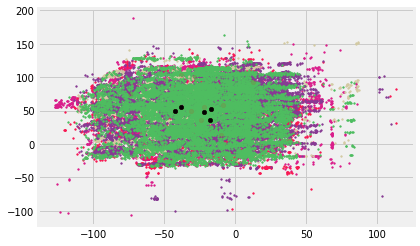

In [7]:
dim1 = 2
dim2 = 6
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))
    
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.1)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")

In [ ]:
from itertools import permutations
targets = [int(i) for i in targets]
clusters = [i.tolist() for i in clusters]
for permutation in permutations([1,2,3,4,5]):
    correct = [0,0,0,0,0]
    for i in range(len(targets)):
        for j in permutation:
            for k in range(5):
                if (targets[i] == j) and (data[i] in clusters[k]):
                    correct[k] += 1
    print(sum(correct),correct)
print("done")

In [218]:
videos=0
photos=0
statuses=0
links=0 
abc=0
vi = clusters[0].tolist()
ph = clusters[0].tolist()
st = clusters[0].tolist()
li = clusters[0].tolist()
aa = clusters[0].tolist()
for i in range(len(targets)):
    if (targets[i] == 1) and (data[i] in vi):
        videos += 1
    if (targets[i] == 2) and (data[i] in ph):
        photos += 1
    if (targets[i] == 3) and (data[i] in st):
        statuses += 1
    if (targets[i] == 4) and (data[i] in li):
        links += 1
    if (targets[i] == 5) and (data[i] in aa):
        abc += 1
print("Vid:", videos)
print("Photo:",photos)
print("Status:",statuses)
print("Links:",links)
print("abc:",abc)
print([videos,photos,statuses,links,abc])

Vid: 4999
Photo: 41
Status: 4634
Links: 191
abc: 38


In [ ]:
0
Vid:    9143
Photo:  359
Status: 10665
Links:  12229
abc:    2113
    
1
Vid:     2075
Photo:   28
Status:  964
Links:   6
abc:    47
    
2
Vid:    0
Photo:  4026
Status: 81
Links:  2349
abc:    9355
    
3
Vid:    48
Photo:  10524
Status: 0
Links:  0
abc:    4180
    
4
Vid:    4999
Photo:  41
Status: 4634
Links:  191
abc:    38

In [3]:
items = [[9143,359,10665,12229,2113],
 [2075,28,964,6,47],
 [0,4026,81,2349,9355],
 [48,10524,0,0,4180],
 [4999,41,4634,191,38]]
maxval = 0
for permutation in permutations([1,2,3,4,5]):
    value = 0
    for i in range(5):
        value += items[i][permutation[i]-1]
    if value > maxval:
        maxval = value
        bestperm = permutation
print(bestperm)
print("%s/%s" % (maxval,len(data)))

NameError: name 'permutations' is not defined

In [107]:
#https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

file = open("weatherAUS.csv","r")
lines = file.readlines()
file.close()
data = []
targets = []
for line in lines[1:]:
    splitline = line.split(",")
    target = splitline[-1]
    if splitline[-1] == "No\n":
        targets.append(0)
    else:
        targets.append(1)
    splitline = splitline[2:7] + [splitline[8]] +splitline[11:21] + [splitline[22]]
    for i in range(17):
        if splitline[i] == "NA":
            splitline[i] = None
        else:
            splitline[i] = float(splitline[i])
    data.append(splitline)
    
data = data[:1000]
targets = targets[:1000]

centres, clusters, centrehistory = kmeans2(data,2)
print("done")


done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


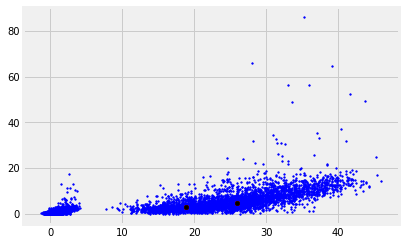

In [109]:
dim1 = 1
dim2 = 3

colormap = {0:"r",1:"b",2:"g",3:"grey",4:"white"}
    
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=colormap[clusters.index(i)])
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")


In [ ]:
acc1 = 0
acc2 = 0
count = 0
for i in range(1000):
    try:
        count += 1
        if targets[i] == 0:
            if any([all([data[i][j] == x[j] for j in range(17)]) for x in clusters[1]]):
                acc1 += 1
        elif targets[i] == 1:
            if any([all([data[i][j] == x[j] for j in range(17)]) for x in clusters[0]]):
                acc2 += 1
        if i % 100 == 0:
            print(i)
    except KeyboardInterrupt:
            print(acc1,acc2,acc1+acc2,count)
            raise error
print(acc1,acc2,acc1+acc2)

0
100
200
300
400
500
600
700
800


In [106]:
print(len(data))
print(len(clusters[0]),len(clusters[1]))

    
    
def distance(x,y):
    # Given two data points, calculates the Euclidean distance between them
    dist = 0
    for i in range(len(x)):
        if x[i] is None or y[i] is None:
            continue
        dist += (x[i]-y[i])**2
    return np.sqrt(dist)

def indexofclosest(x,centres):
    # Given a list "centres", finds which centre is closest to x and returns its index in the list
    shortest = 9999999999999
    for i in range(len(centres)):
        dist = distance(x,centres[i])
        if (dist < shortest):
            closestcentre = i
            shortest = dist
    return closestcentre

def canimprove(errors,tolerance):
    # For the main loop of kmeans2()
    if errors is None:
        return True
    for i in errors:
        if i > tolerance:
            return True
    return False
    
def myround(x,digits):
    if x == None:
        return None
    else:
        return round(x,digits)

def kmeans2(X,K=3, tolerance = 0.0001):
    
    normdata = np.array(X)
    for i in range(17):
        excludenone = normdata[:,i][normdata[:,i] != None]
        mean = np.mean(excludenone)
        std = np.std(excludenone)
        for j in range(len(normdata)):
            if normdata[j][i] != None:
                normdata[j][i] = (normdata[j][i] - mean)/std + 1
    Xnorm = normdata
        
    # K-means clustering of data X into K clusters
    centres = []
    centresnorm = []
    clusters = [[] for i in range(K)] # Have a list containing the data split up into K lists according to which centre is closest
    for i in range(K):
        x = random.choice(X)
        index = np.where(X==x)#X.index(x)
        centres.append(x) # Get K random initial centres
        centresnorm.append(Xnorm[index])
    clustersnorm = clusters

    for i in range(len(Xnorm)): # For each item in data set, get closest centre
        coord = Xnorm[i]
        index = indexofclosest(coord,centres)
        clustersnorm[index].append(coord) # Append each coordinate to corresponding list
        clusters[index].append( X[i] )
        
    for i in range(K): # Convert into a numpy array
        clusters[i] = np.asarray(clusters[i])
        clustersnorm[i] = np.asarray(clustersnorm[i])

    centrehistory = [list(centres)] # Keep track of previous cluster centres in each iteration
    errors = None
    dims = len(clusters[0][0])
    while canimprove(errors,tolerance):
        errors = []
        for i in range(K): # Go through each cluster
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clustersnorm[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    sumofpoints[dim] = None

            errors.append(distance(sumofpoints,centres[i]))
            centresnorm[i] = (sumofpoints)
            
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clusters[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1#
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    sumofpoints[dim] = None
            centresnorm[i] = (sumofpoints)

        centrehistory.append(list(centres))

        clusters = [[] for i in range(K)]
        clustersnorm = clusters

        for i in range(len(Xnorm)):
            coord = Xnorm[i]
            index = indexofclosest(coord,centres)
            clustersnorm[index].append(coord)
            clusters[index].append( X[i] )#Xnorm.index(coord)] )
        for i in range(K):
            clusters[i] = np.asarray(clusters[i])
            clustersnorm[i] = np.asarray(clusters[i])
            
        return (centres, clusters,centrehistory)
            
        for i in range(len(data)):
            found = False
            for cluster in clusters:
                for j in range(len(cluster)):
                    '''neithernone = [cluster[j][p]!=None and X[i][p]!=None for p in range(17)]
                    for p in range(17):
                        if neithernone[p]:
                            neithernone[p] = p
                    neithernone = filter(lambda a: a != False, neithernone)   '''     
                    #neithernone = neithernone[neithernone != False]
                    if all([myround(cluster[j][p],8) == myround(X[i][p],8) for p in range(17)]):#if list(cluster[j]) == list(X[i]):
                                cluster[j] = origdata[i]
                                found = True
                                break
                    ''' for p in range(17):
                        if cluster[j][p] != None and X[i][p] != None:
                            if round(cluster[j][p],8) == round(X[i][p],8):
                                cluster[j] = origdata[i]
                                found = True
                                break
                        elif cluster[j][p] == None and X[i][p] == None:
                                cluster[j] = origdata[i]
                                found = True
                                break
                    if found:
                        break'''
                if found:
                    break
          
    return (centres, clusters,centrehistory)
        

centres, clusters, centrehistory = kmeans2(data,2)
print(clusters)

10000
19650 350
[array([[1.286471113158233, 0.8310589176619338, 0.8184661948897368, ...,
        1.0284701459914607, 0.8669775429323643, 0.7494508069316932],
       [13.4, 22.9, 0.6, ..., 16.9, 21.8, 0.0],
       [0.3329743977728099, 1.1393727116078085, 0.7493392182724641, ...,
        1.076969076156935, 1.2284271767422987, 0.7494508069316932],
       ...,
       [21.4, 29.2, 0.0, ..., 26.0, 27.8, 2.0],
       [2.8915239173903613, 1.938185723194846, 0.9797624736633731, ...,
        2.208610780017999, 1.777830620133399, 1.049309446705955],
       [23.5, 30.8, 2.0, ..., 24.2, 28.1, 2.6]], dtype=object), array([[None, 2.190442463696016, None, ..., None, None,
        0.7494508069316932],
       [None, 32.6, None, ..., None, None, 0.0],
       [2.2717510523898365, 1.5738148758042672, None, ..., None, None,
        0.7955829053585026],
       ...,
       [5.5, 19.3, 0.0, ..., 12.8, 18.4, 0.0],
       [2.2399678285436555, 1.3215581353030972, 4.136561072518825, ...,
        1.852951958804522,

In [ ]:
def kmeans2(X,K=3, tolerance = 0.0001):
    
    normdata = np.array(X)
    for i in range(17):
        excludenone = normdata[:,i][normdata[:,i] != None]
        mean = np.mean(excludenone)
        std = np.std(excludenone)
        for j in range(len(normdata)):
            if normdata[j][i] != None:
                normdata[j][i] = (normdata[j][i] - mean)/std + 1
    Xnorm = normdata
        
    # K-means clustering of data X into K clusters
    centres = []
    centresnorm = []
    clusters = [[] for i in range(K)] # Have a list containing the data split up into K lists according to which centre is closest
    for i in range(K):
        x = random.choice(X)
        index = np.where(X==x)#X.index(x)
        centres.append(x) # Get K random initial centres
        centresnorm.append(Xnorm[index])
    clustersnorm = clusters

    for i in range(len(Xnorm)): # For each item in data set, get closest centre
        coord = Xnorm[i]
        index = indexofclosest(coord,centres)
        clustersnorm[index].append(coord) # Append each coordinate to corresponding list
        clusters[index].append( X[i] )
        
    for i in range(K): # Convert into a numpy array
        clusters[i] = np.asarray(clusters[i])
        clustersnorm[i] = np.asarray(clustersnorm[i])

    centrehistory = [list(centres)] # Keep track of previous cluster centres in each iteration
    errors = None
    dims = len(clusters[0][0])
    while canimprove(errors,tolerance):
        errors = []
        for i in range(K): # Go through each cluster
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clustersnorm[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    sumofpoints[dim] = None

            errors.append(distance(sumofpoints,centres[i]))
            centresnorm[i] = (sumofpoints)
            
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clusters[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1#
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    sumofpoints[dim] = None
            centresnorm[i] = (sumofpoints)

        centrehistory.append(list(centres))

        clusters = [[] for i in range(K)]
        clustersnorm = clusters

        for i in range(len(Xnorm)):
            coord = Xnorm[i]
            index = indexofclosest(coord,centres)
            clustersnorm[index].append(coord)
            clusters[index].append( X[i] )#Xnorm.index(coord)] )
        for i in range(K):
            clusters[i] = np.asarray(clusters[i])
            clustersnorm[i] = np.asarray(clusters[i])
            
        return (centres, clusters,centrehistory)
            